# Introduction

This article covers:

* Precision
* Recall
* F1 Score

# Motivation

Suppose we are tasked with detecting anomalies in the following dataset.

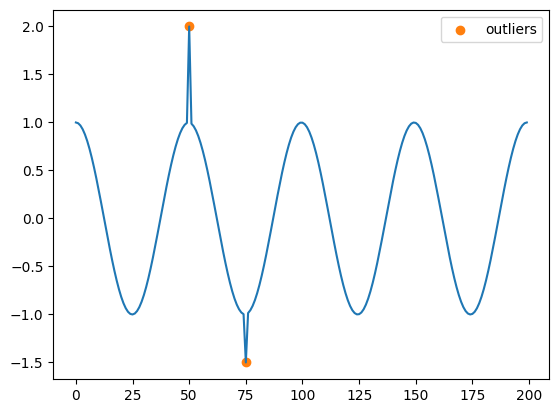

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 200
f = 4  # Frequency

x = np.cos(np.linspace(0, 2 * f * np.pi, n))
x[50] = 2
x[75] = -1.5

y = np.zeros(n)
y[50] = 1
y[75] = 1

outlier_pos = np.argwhere(y)[:, 0]

fig, ax = plt.subplots()
ax.plot(x)
ax.scatter(outlier_pos, x[outlier_pos], color="tab:orange", label="outliers")
ax.legend()

Our dataset `x` has two outliers. Let us use a simple threshold to find these outliers. A threshold of 1.75 means our model will only capture one of the outliers.

In [2]:
def find_outliers(x, threshold=1.5):
    return (x >= threshold) | (x <= - threshold)

y_hat = find_outliers(x, 1.75)
print("Number of outliers found:", sum(y_hat))

Number of outliers found: 1


Now let us calculate the accuracy of our predictions.

In [3]:
(y == y_hat).mean()

0.995

The model is 99.5% accuracy. But since this is an outlier detection problem, we know that outliers are going to be rare so have a model that can find the *not anomalous* points is not very useful.

In fact, in this example, if our model simply predicted *not anomalous* all the time, then it would have an accuract of 99% since there are 200 data points and 2 anomalies. This highlights the limitations of using accuracy in some problems. What we can use instead is precision and recall.

## Precision

Precision is a measure of the proportion of predicted positives that were actually true positives.

In [11]:
from IPython.core.display import Image
from IPython.display import display

display(Image(url='Images/precision.png', width=200))

The formula for precisions is:

$$
    \text{precision} = \frac{\text{TP}}{\text{TP + FP}}
$$

Let us calculate precision for our example.

In [17]:
tp = ((y == 1) & (y_hat == 1)).sum()
fp = ((y == 0) & (y_hat == 1)).sum()

print(f"TP: {tp},  FP: {fp}")

TP: 1,  FP: 0


So, the precisions is:

In [19]:
precision = tp / (tp + fp)
print(f"Precision: {precision}")

Precision: 1.0


So, the precision higher than the accuracy. This metric still misses the fact that one of the true positives has been missed. This is where recall comes in.

## Recall

Recall is the proportion of actuall positives that were predicted to be positive. It involes true positives and false negatives.

In [20]:
from IPython.core.display import Image
from IPython.display import display

display(Image(url='Images/recall.png', width=200))

The formula for recall is:

$$
    \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Let us calculate recall for our example.

In [22]:
tp = ((y == 1) & (y_hat == 1)).sum()
fn = ((y == 1) & (y_hat == 0)).sum()

recall = tp / (tp + fn)

print(recall)

0.5


Our model detect one anomaly correctly but detected the other incorrectly to recall reflects reflects that property well.

Recall does not take into account false positives though which may be important. F1 score combines both precision and recall.

## F1 Score

F1 score is the harmonic mean of precision and recall. We will discuss the harmonic mean later on but for now let create our own version of F1 score using the arithmetic mean (add up your numbers and divide by how many there are). So, the formula for our version of F1 score which we will call $\hat{F1}$ is:

$$
    \hat{F1} = \frac{\text{precision} + \text{recall}}{2}
$$

Let us calculate $\hat{F1}$ for our model.

In [24]:
tp = ((y == 1) & (y_hat == 1)).sum()
fp = ((y == 0) & (y_hat == 1)).sum()
fn = ((y == 1) & (y_hat == 0)).sum()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1_hat = (precision + recall) / 2

print(f"F1 hat: {f1_hat}")

F1 hat 0.75


$\hat{F1}$ is slightly higher than recall, so our score has been increased because the model did not predict any false positives.

# F1 Score

F1 score is a method for quantifying the performance of a model. It is typically used for binarcy classification but F1 score can be extended to multiclass problems as well.

In [4]:
%pip install numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

Let us create a toy dataset classifying two gaussian distributions.

In [31]:
n = 50
x = np.concatenate([
    np.random.normal([1, 0], 1, size=(n, 2)),
    np.random.normal([-1, 0], 1, size=(n, 2))
])
y = np.asarray([0] * n + [1] * n)

Plot `x` and `y`.

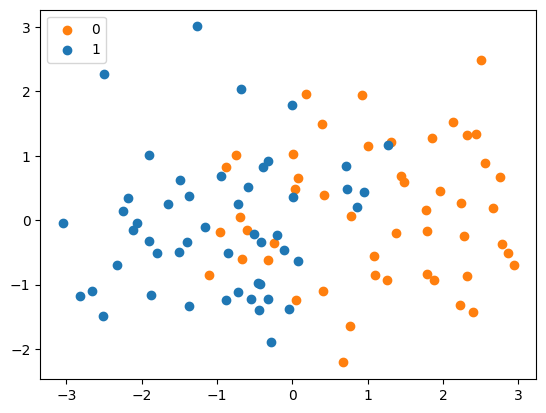

In [32]:
plt.scatter(x[:n, 0], x[:n, 1], color="tab:orange", label=0)
plt.scatter(x[n:, 0], x[n:, 1], color="tab:blue", label=1)
plt.legend()

Let us train a logistic regression model on this data.

In [36]:
model = linear_model.LogisticRegression()
model.fit(x, y)
y_hat = model.predict(x)

Plot the predictions and the true labels.

Text(0.5, 1.0, 'Predictions')

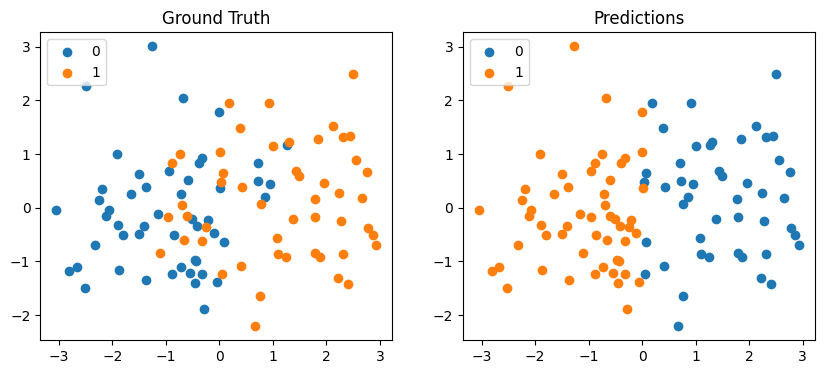

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x[n:, 0], x[n:, 1], label=0)
ax[0].scatter(x[:n, 0], x[:n, 1], label=1)
ax[0].legend()
ax[0].set_title("Ground Truth")

ax[1].scatter(x[y_hat == 0, 0], x[y_hat == 0, 1], label=0)
ax[1].scatter(x[y_hat == 1, 0], x[y_hat == 1, 1], label=1)
ax[1].legend()
ax[1].set_title("Predictions")

The model clearly gets several predictions wrong. We can break our predictions, `y_hat`, down into for categories:

1. `y_hat` is 1 and `y_hat` is 1 (true positive).
2. `y_hat` is 1 and `y_hat` is 0 (false negative).
3. `y_hat` is 0 and `y_hat` is 1 (false positive).
4. `y_hat` is 0 and `y_hat` is 0 (true negative).

Let us calculate these quantitites for our model.

In [54]:
true_pos = np.sum((y == 1) & (y_hat == 1))
true_neg = np.sum((y == 0) & (y_hat == 0))
false_pos = np.sum((y == 0) & (y_hat == 1))
false_neg = np.sum((y == 1) & (y_hat == 0))

print(f"true_pos: {true_pos},  true_neg: {true_neg},  false_pos: {false_pos},  false_neg: {false_neg}")

true_pos: 44,  true_neg: 40,  false_pos: 10,  false_neg: 6


Our model gives mostly true positives and true negatives which is good. When assessing the quality of the model, our appetite for false positives and false negatives may depend on our application. For example:

* If 1 means a patients has a disease and 0 means they don't, we may be more willing to accept false positives than false negatives.

# Precision and Recall

Precisions and recall is a way of comparing the actual results with the predicted results.

$$
\text{precision} = \frac{\text{true positive}}{\text{true positive} + \text{false positive}}, \quad
\text{recall} = \frac{\text{true positive}}{\text{true positive} + \text{false negative}}
$$

* Precision is the proportion of positive predictions that were actually positive.
* Recall is the proportion of actual positives that were predicted to be positive.

Let us write functions to calculate precision and recall.

In [59]:
def calculate_precision(y, y_hat):
    true_pos = np.sum((y == 1) & (y_hat == 1))
    false_pos = np.sum((y == 0) & (y_hat == 1))
    return true_pos / (true_pos + false_pos)

def calculate_recall(y, y_hat):
    true_pos = np.sum((y == 1) & (y_hat == 1))
    false_neg = np.sum((y == 1) & (y_hat == 0))
    return true_pos / (true_pos + false_neg)

precision = calculate_precision(y, y_hat)
recall = calculate_recall(y, y_hat)

print(f"Precision: {precision},  Recall: {recall}")

Precision: 0.8148148148148148,  Recall: 0.88


Precisions would be 1 if we had 0 false positives. Recall would be 1 if we had 0 false negatives.

# F1 Score

F1 score is the harmonic mean of precision and recall. Let us first recall the definition of harmonic mean. Suppose we have a sequence of numbers $x_1, x_2, \dots, x_n$. The harmonic mean of this set of numbers is,

$$
\frac{n}{x_1^{-1} + x_2^{-1} + \dots + x_n^{-1}}
$$

So, the harmonic mean of precision and recall (F1 score) is,

$$
F1 = \frac{2}{\text{precision}^{-1} + \text{recall}^{-1}} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{\text{2 tp}}{\text{2 tp} + fp + fn}
$$

Let us write a function for calculate the F1 score.

In [62]:
def calculate_f1(y, y_hat):
    recall = calculate_recall(y, y_hat)
    precision = calculate_precision(y, y_hat)
    return 2 * (precision * recall) / (precision + recall)

f1_score = calculate_f1(y, y_hat)
print(f"F1 score: {f1_score}")

F1 score: 0.8461538461538461


Why is the harmonic mean used when calculating f1 score as opposed to the arithmetic mean?